In [1]:
import pandas as pd
import numpy as np
import skimage.io as io
from scipy import ndimage as ndi
from skimage import feature
from skimage import color
from matplotlib import pyplot as plt

from scipy.misc import imresize

In [3]:
train_Y = pd.read_csv("data/train.csv")
train_Y.head()

,FileName,DigitLabel,Left,Top,Width,Height
0,1.png,1,246,77,81,219
1,1.png,9,323,81,96,219
2,2.png,2,77,29,23,32
3,2.png,3,98,25,26,32
4,3.png,2,17,5,8,15


In [5]:
def getimgin(i):
    return int(train_Y.ix[i].ix['FileName'].replace('.png',''))-1

In [6]:
coll = io.imread_collection('./data/train_images/*.png')

In [6]:
modcoll = np.zeros((len(coll.files),28,74))
for i in range(len(coll.files)):
    modcoll[i,:,:]= color.rgb2gray(imresize(coll[i],(28,74),interp='cubic'))

In [8]:
modtrain_Y = train_Y.copy()
for i in range(len(train_Y)):
    
    ysca , xsca = 28/coll[getimgin(i)].shape[0], 74/coll[getimgin(i)].shape[1]
    modtrain_Y.set_value(i, 'Left', train_Y.ix[i]['Left']*xsca)
    modtrain_Y.set_value(i, 'Top', train_Y.ix[i]['Top']*ysca)
    modtrain_Y.set_value(i, 'Width', train_Y.ix[i]['Width']*xsca)
    modtrain_Y.set_value(i, 'Height', train_Y.ix[i]['Height']*ysca)

KeyboardInterrupt: 

In [8]:
def mark(num):
    io.imshow(coll[num-1])
    loca = train_Y.loc[train_Y['FileName']==str(num)+'.png']
    print(loca)
    left = loca['Left']
    top = loca['Top']
    right = loca['Width']+left
    bottom = loca['Height']+top
    
    plt.plot(left,top,'yo')
    plt.plot(left,bottom,'bo')
    plt.plot(right,top,'ro')
    plt.plot(right,bottom,'go')
    
    plt.figure()
    
    io.imshow(modcoll[num-1])
    loca = modtrain_Y.loc[modtrain_Y['FileName']==str(num)+'.png']
    print(loca)
    left = loca['Left']
    top = loca['Top']
    right = loca['Width']+left
    bottom = loca['Height']+top
    
    plt.plot(left,top,'yo')
    plt.plot(left,bottom,'bo')
    plt.plot(right,top,'ro')
    plt.plot(right,bottom,'go')
    plt.show()

In [9]:
def markcanny(num):
    io.imshow(feature.canny(color.rgb2gray(coll[num-1]), sigma=0.1))
    loca = train_Y.loc[train_Y['FileName']==str(num)+'.png']
    left = loca['Left']
    top = loca['Top']
    right = loca['Width']+left
    bottom = loca['Height']+top
    
    plt.plot(left,top,'yo')
    plt.plot(left,bottom,'bo')
    plt.plot(right,top,'ro')
    plt.plot(right,bottom,'go')
    plt.show()

In [10]:
train_loc = train_Y[['Left','Top','Width','Height']]
train_Y.head()

,FileName,DigitLabel,Left,Top,Width,Height
0,1.png,1,246,77,81,219
1,1.png,9,323,81,96,219
2,2.png,2,77,29,23,32
3,2.png,3,98,25,26,32
4,3.png,2,17,5,8,15


In [11]:
d = np.zeros((len(coll.files),2))
for i in range(len(coll.files)):
    d[i,0]=coll[i].shape[0]
    d[i,1]=coll[i].shape[1]

In [12]:
r = np.zeros(900)
c = np.zeros(900)
for x,y in d:
    r[int(x)]+=1
    c[int(y)]+=1

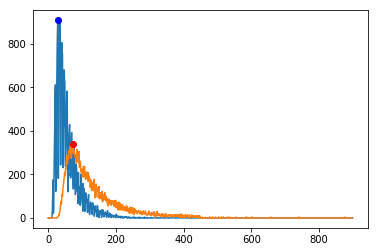

28
74


In [13]:
plt.plot(r)
plt.plot(c)
plt.plot(28,r[28],'bo')
plt.plot(74,c[74],'ro')
plt.show()
print(r.argmax())
print(c.argmax())

In [14]:
print(np.average(d[:,0]))
print(np.average(d[:,1]))

57.2130111969
128.284982935


      FileName  DigitLabel  Left  Top  Width  Height
8956  4057.png           2    59   10     29      48
8957  4057.png           7    91   13     28      48
      FileName  DigitLabel  Left  Top  Width  Height
8956  4057.png           2    24    3     12      18
8957  4057.png           7    38    4     11      18


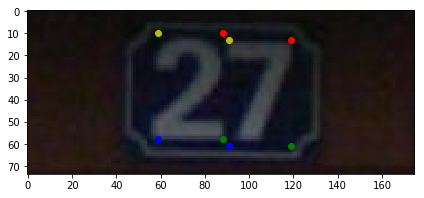

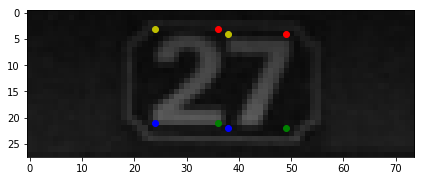

In [22]:
mark(np.random.randint(10000))

In [129]:
np.save("modimages3", modcoll)

In [130]:
np.save("modtrain3",modtrain_Y)

In [9]:
mergetrain_y = pd.DataFrame(np.zeros((len(coll.files),5)))
mergetrain_y.columns = ['0','1','2','3','4']
mergetrain_y.head()

,0,1,2,3,4
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0


In [10]:
for i in range(1,len(coll.files)+1):
    dass = train_Y.loc[train_Y['FileName'] == (str(i)+'.png')]
    mergetrain_y.set_value(i-1, 'FileName', (str(i)+'.png'))
    j=0
    for m in dass['DigitLabel']:
        mergetrain_y.set_value(i-1, str(j), m)
        j+=1

KeyboardInterrupt: 

In [115]:
del mergetrain_y['5']
mergetrain_y.head()

,0,1,2,3,4,FileName
0,1.0,9.0,0.0,0.0,0.0,1.png
1,2.0,3.0,0.0,0.0,0.0,2.png
2,2.0,5.0,0.0,0.0,0.0,3.png
3,9.0,3.0,0.0,0.0,0.0,4.png
4,3.0,1.0,0.0,0.0,0.0,5.png


In [116]:
np.save("mergetrain", mergetrain_y)

In [33]:
mergetrain_y = np.load("mergetrain.npy")
mergetrain_y = np.delete(mergetrain_y,-1,1)
mergetrain_y[:] = mergetrain_y[:] > 0
numtrain = np.zeros(len(mergetrain_y))

In [35]:
for i in range(len(numtrain)):
    numtrain[i]=sum(mergetrain_y[i])

In [48]:
np.save("numtrain", numtrain)

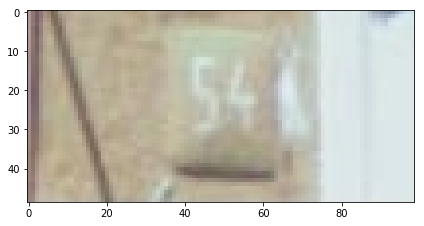

[ 2.]


In [25]:
num =np.random.randint(10000)
io.imshow(coll[num])
plt.show()
print(numtrain[num])

In [4]:
X = np.load("resizecrop.npy")
y = np.load("nummertrain.npy").astype(int)

In [5]:
k=5
X4 = []
y4 = []

for i in range(len(y)):
    if y[i][k-1]!=0:
        X4.append(X[i])
        y4.append(y[i])
        
X4 = np.array(X4)
y4 = np.array(y4)

np.save("Xcropresize"+str(k),X4)
np.save("Ycropresize"+str(k),y4)

/home/a/workspace/venv/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


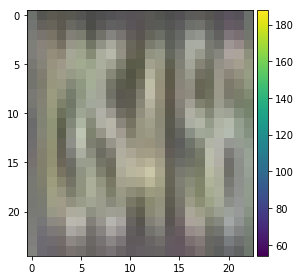

[1 3 5 4 5 5]


In [10]:
num =np.random.randint(len(y4))
io.imshow(X4[num])
plt.show()
print(y4[num])